# Exploratory Data Analysis (EDA)
## Early Multi-Disease Risk Prediction

### Objective
The objective of this exploratory data analysis is to understand the structure,
quality, and patterns in the BRFSS health indicators dataset, analyze disease
prevalence and risk factors, and extract insights to guide feature engineering
and model development for early disease risk prediction.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)
plt.style.use("seaborn-darkgrid")
pd.set_option("display.max_columns", None)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [22]:
# load data
df = pd.read_csv("../data/raw/brfss_2015.csv")

df.shape

(253680, 22)

In [23]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### BASIC DATA OVERVIEW

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [25]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [26]:
# Data Dictionary
df.nunique().sort_values(ascending=False)


BMI                     84
PhysHlth                31
MentHlth                31
Age                     13
Income                   8
Education                6
GenHlth                  5
Diabetes_012             3
PhysActivity             2
Fruits                   2
Veggies                  2
HighBP                   2
AnyHealthcare            2
NoDocbcCost              2
HeartDiseaseorAttack     2
Stroke                   2
Smoker                   2
DiffWalk                 2
Sex                      2
CholCheck                2
HighChol                 2
HvyAlcoholConsump        2
dtype: int64

In [27]:
# MISSING VALUES ANALYSIS
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [28]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [33]:
# keep both the dataframes
df["Diabetes_risk_level"] = df["Diabetes_012"].map({
    0: "Low",
    1: "Medium",
    2: "High"
})

In [34]:
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# TARGET VARIABLE DISTRIBUTION
targets = [
    "HeartDiseaseorAttack",
    "Diabetes_binary",
    "Stroke",
    "HighBP"
]

for col in targets:
    print(df[col].value_counts(normalize=True))
    print("-" * 40)


0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64
----------------------------------------
0    0.842412
1    0.157588
Name: Diabetes_binary, dtype: float64
----------------------------------------
0.0    0.959429
1.0    0.040571
Name: Stroke, dtype: float64
----------------------------------------
0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64
----------------------------------------


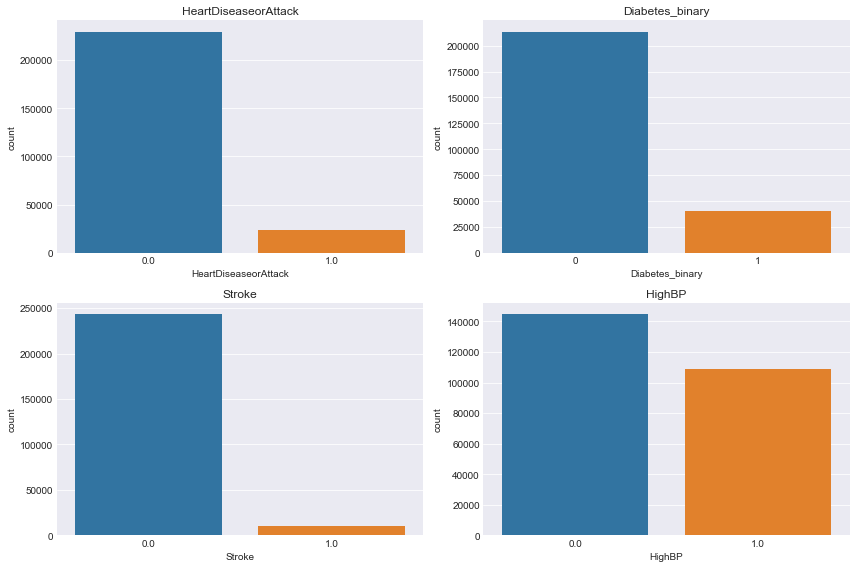

In [36]:
# VISUALIZE TARGET IMBALANCE
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(targets):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


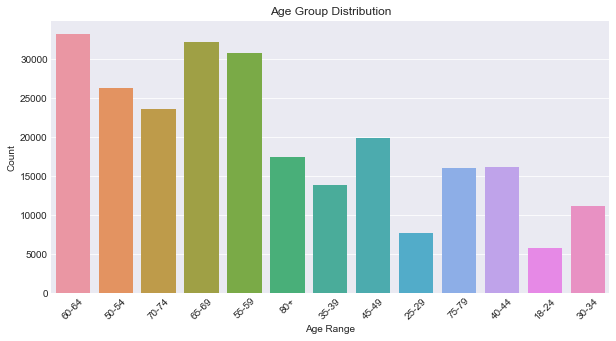

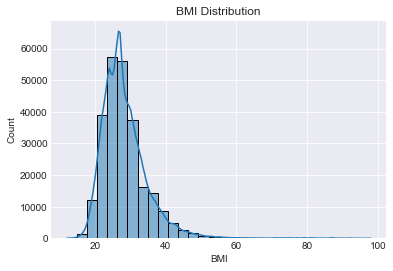

In [42]:
# UNIVARIATE ANALYSIS (KEY RISK FACTORS)

#Age distribution
age_map = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39",
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59",
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80+"
}

df["AgeGroup"] = df["Age"].map(age_map)

plt.figure(figsize=(10, 5))
sns.countplot(x="AgeGroup", data=df)
plt.title("Age Group Distribution")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



#BMI Distribution
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()



Note: Age in the BRFSS dataset is represented as ordinal age groups rather than
continuous values. Therefore, a count-based visualization is used instead of
a histogram to avoid misleading interpretations.


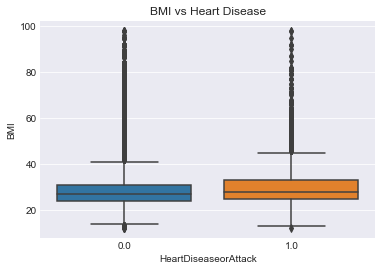

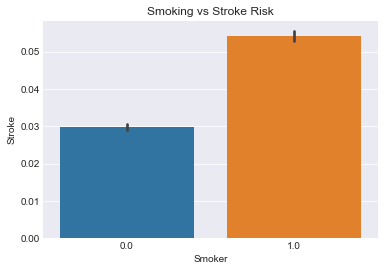

In [38]:
# BIVARIATE ANALYSIS

#BMI vs Heart Disease
sns.boxplot(x=df["HeartDiseaseorAttack"], y=df["BMI"])
plt.title("BMI vs Heart Disease")
plt.show()

# Smoking vs Stroke
sns.barplot(x=df["Smoker"], y=df["Stroke"])
plt.title("Smoking vs Stroke Risk")
plt.show()

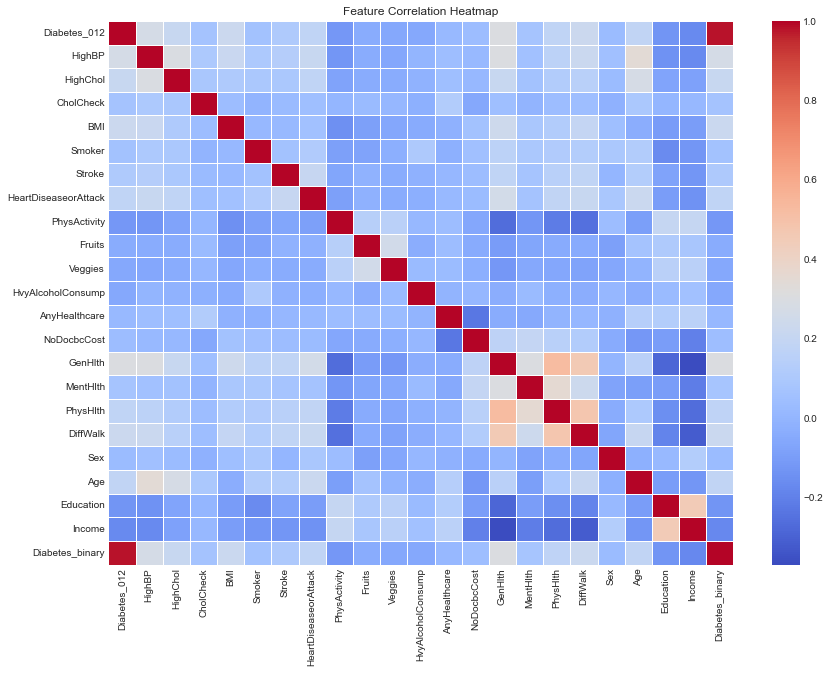

In [39]:
# CORRELATION HEATMAP

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Key EDA Insights

- The dataset contains over 250,000 records with no missing values, making it
  suitable for large-scale ML modeling.
- Lifestyle factors such as BMI, smoking, and physical inactivity show strong
  associations with multiple chronic diseases.
- Disease classes are imbalanced, reflecting real-world healthcare data.
- Certain risk factors influence multiple diseases, justifying a unified
  multi-disease prediction framework.
